# Tarea 3

Author: Emmanuel Larralde

## Resumen

En esta tarea se implementa el algoritmo *Steepest Graident Descent*, para encontrar mínimos de la función de Rosenbrock y reducir la dimensionalidad del conjunto de datos *iris*, utilizando hasta 3 estimaciones diferentes del mejor tamaño de paso.

## Instalación

Hablando en primera persona, siempre recomiendo usar un ambiente basado en unix (Linux, MacOs, Windows Subsystem for Linux) para facilitar la instalación.

1. (Recomendado pero no necesario) Crea un ambiente virtual:
   
```sh
pip install virtualenv    
python -m venv .env
```

2. Instala las librerías

```sh
pip install -r requirements.txt
```

Si existe algún problema con esta versión estática, puedes revisar la versión en [GitHub]()

## Introducción

El algoritmo de descenso de gradiente es un algoritmo de optimización sin restricciones de búsqueda en lineal (asume una aproximación lineal en la vecindad) interesado en resolver un problema de minimizar $f(x)$ con $x \in R^n$, donde $f(x)$ es una función diferenciable. Si $x = \bar{x}$ es un punto dado, $f(x)$ puede ser aproximado por su aproximación lineal:

\begin{align}
    f(\bar x + d) \approx f(\bar x) + \nabla f(\bar x )^T d
\end{align}

Si $||d||$ es pequeño.

Y se puede demostrar que la dirección de descenso más "empinada" es $d = - \nabla f(\bar x)$.

Recordemos que el algoritmo es iterativo, donde dado una aproximación inicial $x_0$, se buscará una mejor $x_k$ tal que minimice $f(x_k)$. La forma de actualizar la estimación es la siguiente:

$$
x_{k+1} = x_k + \alpha_k d_k
$$

Donde $d_k = -g(x_k)$ y $\alpha_k$ es una estimación del mejor tamaño de paso que puede obtenerse al resolver $min_{\alpha} f(x_k + \alpha d_k)$ con una búsqueda lineal.

Dado a que no se puede asegurar de que existen soluciones exactas, ya sea por la naturaleza del problema o errores numéricos, se requieren de criterios de paro para terminar el programa. Los utilizados son los siguientes:

\begin{align}
    \frac{|f(x_{k+1}) - f(x_k)|}{max\{1, f(x_{k+1})\}} &\leq \tau_f \\
    \frac{||x_{k+1} - x_k||}{max\{1, ||x_{k+1}||\}} &\leq \tau_x \\ 
    reps &< MAX REPS
\end{align}

Siendo el último criterio una cantidad de iteraciones máximas que permitimos que algoritmo tome. Tanto $\tau_f$, como $\tau_f$ y $MAXREPS$ son parámetros seleccionados por el programador.



A continuación se muestran algunas de las estimaciones del mejor tamaño de paso y el nombre que se utiliza para referirse a estas:
- "FIXED_STEP":
  $$\alpha_k = 0.0001$$
- "APPROX1_STEP":
  $$\alpha_k = \frac{g_k^T g_k}{g_k^T H_k g_k}$$
- "APPROX2_STEP":
    $$\alpha_k = \frac{g_k^T g_k \alpha_{k-1}^2}{2(f_{k-1} - f_k + \alpha_{k-1} g_k^T g_k})$$

## Algoritmo

El siguiente bloque es una representación sencilla de cómo es el algoritmo:

```python
def steepest_gradient_descent(x0):
    x = x0
    while not met_stop_criteria():
        alpha = estimate_alpha()
        x = x - alpha * g(x)
    return x
```

## Resultados

## Ejercicio 1. Implementación del *steepest gradient descent*


Nótese que en el archivo ubicado en `./src/descent.py` existe una clase llamada `SteepestDescent`. Esta clase implementa el algoritmo. Resaltemos algunas líneas de código:

```python
class SteepestDescent:
    FIXED_ALPHA = 0.00001

    def __init__(self, function: C2class, alpha_estimator: str = "") -> None:
        self.f = function #Función a resolver
        self.prev_x = None
        self.x = None
        self.prev_alpha = SteepestDescent.FIXED_ALPHA
        self.grad = None

        #Selecciona la función de estimación del tamaño de paso
        match alpha_estimator:
            case "FIXED_STEP":
                self.estimate_step_size = self.fixed_step_size
            case "APPROX1_STEP":
                self.estimate_step_size = self.approx1_step_size
            case "APPROX2_STEP":
                self.estimate_step_size = self.approx2_step_size
            case _:
                self.estimate_step_size = self.fixed_step_size

    #Estimación (a)
    def fixed_step_size(self) -> float:
        ...

    #Estimación (b)
    def approx1_step_size(self) -> float:
        ...

    # Estimación (c)
    def approx2_step_size(self) -> float:
        ...

    #Revisa si alguno de los dos criterios de paro se han cumplido
    def met_stop_criteria(self, tf: float, tx: float) -> bool:
        ...

    #Un paso del descenso de gradiente
    def step(self) -> None:
        self.grad = self.f.gradient(self.x)

        alpha = self.estimate_step_size()

        self.prev_x = np.copy(self.x)
        self.x += -alpha * self.grad
        self.prev_alpha = alpha

    #Prepara para iterar
    def pre_solve(self, x0: np.array) -> None:
        ...

    #Función principal
    def solve(
        self,
        x0: np.array,
        tf: float,
        tx: float,
        num_its: int = 1000000
    ) -> tuple:
        self.pre_solve(x0)
        k = 1
        for _ in range(num_its - 1):
            self.step()
            if self.met_stop_criteria(tf, tx):
                break
            k += 1

        return self.x, k
```

## Ejercicio 2

Tómese de la tarea anterior.

- **Función de Rosenbrock**:

$$
    f(x) = \sum_{i=1}^{N-1} [100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2]
$$

Con $x = [x_1, \dots, x_N]^T \in R^N$.

- **Gradiente de la función de Rosenbrock**:

\begin{align*}
    \nabla f(x) 
                &=  \begin{bmatrix}
                        -400x_1(x_2 - x_1^2) - 2(1 - x_1) \\
                        -400x_2(x_3 - x_2^2) - 2(1 - x_2) \\
                        \vdots \\
                        -400x_{N-1}(x_{N} - x_{N-1}^2) - 2(1 - x_{N-1}) \\
                        0
                    \end{bmatrix} +
                    \begin{bmatrix}
                        0 \\
                        200(x_2 - x_1^2) \\
                        200(x_3 - x_2^2) \\
                        \vdots \\
                        200(x_{N} - x_{N-1}^2)
                    \end{bmatrix} \\
\end{align*}

- **Hessiano**:

\begin{align*}
    \nabla^2 f(x) = \begin{bmatrix}
                        -400x_2 + 1200x_1^2 + 2 & -400x_1 & 0 & \dots & 0 & 0 \\
                        -400x_1 & -400x_3 + 1200x_2^2 + 202 & -400x_2 & \dots & 0 & 0 \\
                        0 & -400x_2 & -400x_4 + 1200x_3^2 + 202 & \dots & 0 & 0 \\
                        \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
                        0 & 0 & 0 & \dots & -400x_N + 1200x_{N-1}^2 + 202 & -400x_{N-1} \\
                        0 & 0 & 0 & \dots & -400x_{N-1} & 200\\
                    \end{bmatrix}
\end{align*}

En el archivo `src/differentiable.py` se implementó la función de Rosenbrock con sus respectivos gradiente y hessiano.

In [1]:
from src.differentiable import Rosenbrock

help(Rosenbrock)

Help on class Rosenbrock in module src.differentiable:

class Rosenbrock(builtins.object)
 |  Len agnostic Rosenbrock function.
 |
 |  Static methods defined here:
 |
 |  eval(x: <built-in function array>) -> <built-in function array>
 |      Evaluates the rosenbrock at x.
 |
 |  gradient(x: <built-in function array>) -> <built-in function array>
 |      Gradient of rosenborck at x.
 |
 |  hessian(x: <built-in function array>) -> <built-in function array>
 |      Hessian of the rosenbrock function at x
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object



### a) Encontrar una solución de la función de Rosenbrock con $x \in R^{128}$ y $x^0 = [-1.2, 1, 1, \dots, 1, -1.2, 1]^T$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from src.descent import SteepestDescent
from src.differentiable import Rosenbrock

tf = 1e-15
tx = 1e-15

x0 = np.ones(128)
x0[0] = -1.2
x0[-2] = -1.2

#### a.1 Tamaño de paso fijo

In [3]:
fixed_step_solver = SteepestDescent(Rosenbrock, "FIXED_STEP")
fixed_step_solutions_x0 = np.array([
    [Rosenbrock.eval(x), gx] for x, _, gx in 
    fixed_step_solver.solve_step_by_step(x0, tf, tx)
])

#### a.2 Aproximación 1 del tamaño de paso

In [4]:
app1_step_solver = SteepestDescent(Rosenbrock, "APPROX1_STEP")
app1_step_solutions_x0 = np.array([
    [Rosenbrock.eval(x), gx] for x, _, gx in 
    app1_step_solver.solve_step_by_step(x0, tf, tx)
])

#### a.3 Aproximación 2 del tamaño de paso

In [5]:
app2_step_solver = SteepestDescent(Rosenbrock, "APPROX2_STEP")
app2_step_solutions_x0 = np.array([
    [Rosenbrock.eval(x), gx] for x, _, gx in 
    app2_step_solver.solve_step_by_step(x0, tf, tx)
])

### b) Encontrar una solución de la función de Rosenbrock con $x \in R^{128}$ y $x^0$ aleatorio

In [6]:
x0_rand = np.random.rand(128)

#### b.1 Tamaño de paso fijo

In [7]:
fixed_step_solutions_rand = np.array([
    [Rosenbrock.eval(x), gx] for x, _, gx in 
    fixed_step_solver.solve_step_by_step(x0_rand, tf, tx)
])

#### b.2 Aproximación 1 del tamaño de paso

In [8]:
app1_step_solutions_rand = np.array([
    [Rosenbrock.eval(x), gx] for x, _, gx in 
    app1_step_solver.solve_step_by_step(x0_rand, tf, tx)
])

#### b.3 Aproximación 2 del tamaño de paso

In [9]:
app2_step_solutions_rand = np.array([
    [Rosenbrock.eval(x), gx] for x, _, gx in 
    app2_step_solver.solve_step_by_step(x0_rand, tf, tx)
])

### c). Graficar $(k, f_k)$ y $(k, ||g_k||)$

#### c.1 $x^0 = [-1.2, 1, 1, \dots, 1, -1.2, 1]^T$

##### Variación (minimización) de la función con respecto a la cantidad de pasos.

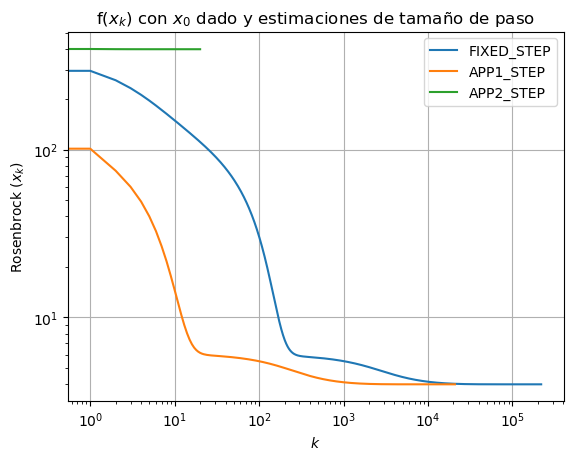

In [10]:
plt.loglog(fixed_step_solutions_x0[:, 0], label='FIXED_STEP')
plt.loglog(app1_step_solutions_x0[:, 0], label='APP1_STEP')
plt.loglog(app2_step_solutions_x0[:, 0], label='APP2_STEP')
plt.legend()
plt.grid()
plt.title("f($x_k$) con $x_0$ dado y estimaciones de tamaño de paso")
plt.xlabel("$k$")
plt.ylabel("Rosenbrock ($x_k$)")
plt.show()

##### Norma del gradiente de la función con respecto a la cantidad de pasos.

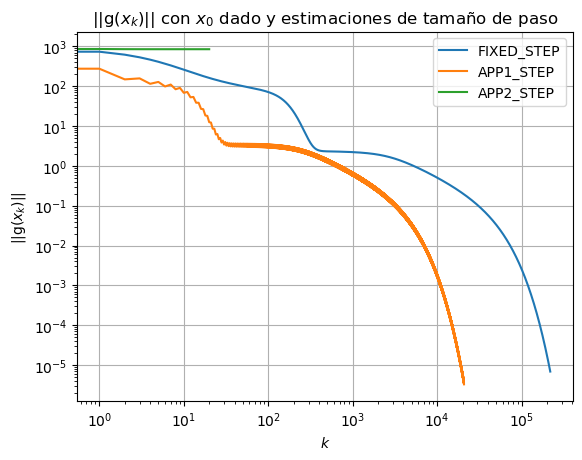

In [11]:
plt.loglog(fixed_step_solutions_x0[:, 1], label='FIXED_STEP')
plt.loglog(app1_step_solutions_x0[:, 1], label='APP1_STEP')
plt.loglog(app2_step_solutions_x0[:, 1], label='APP2_STEP')
plt.legend()
plt.grid()
plt.title("||g($x_k$)|| con $x_0$ dado y estimaciones de tamaño de paso")
plt.xlabel("$k$")
plt.ylabel("||g($x_k$)||")
plt.show()

#### c.2 $x^0$ aleatorio

##### Variación (minimización) de la función con respecto a la cantidad de pasos.

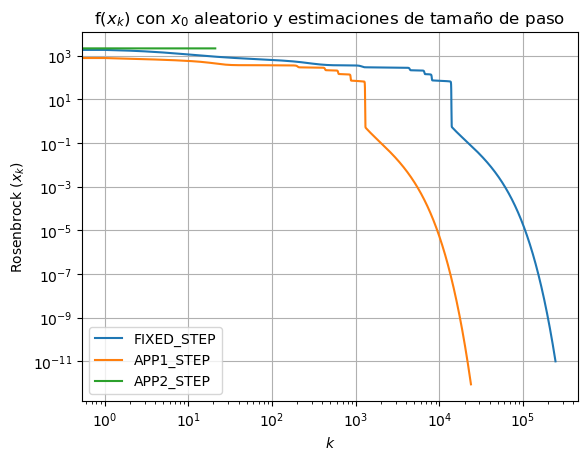

In [12]:
plt.loglog(fixed_step_solutions_rand[:, 0], label='FIXED_STEP')
plt.loglog(app1_step_solutions_rand[:, 0], label='APP1_STEP')
plt.loglog(app2_step_solutions_rand[:, 0], label='APP2_STEP')
plt.legend()
plt.grid()
plt.title("f($x_k$) con $x_0$ aleatorio y estimaciones de tamaño de paso")
plt.xlabel("$k$")
plt.ylabel("Rosenbrock ($x_k$)")
plt.show()

##### Norma del gradiente de la función con respecto a la cantidad de pasos.

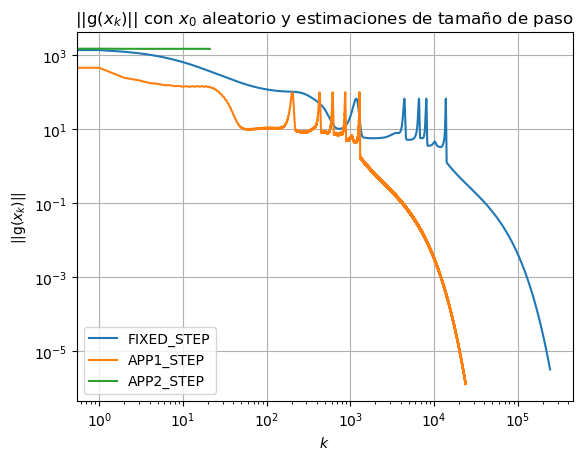

In [13]:
plt.loglog(fixed_step_solutions_rand[:, 1], label='FIXED_STEP')
plt.loglog(app1_step_solutions_rand[:, 1], label='APP1_STEP')
plt.loglog(app2_step_solutions_rand[:, 1], label='APP2_STEP')
plt.legend()
plt.grid()
plt.title("||g($x_k$)|| con $x_0$ aleatorio y estimaciones de tamaño de paso")
plt.xlabel("$k$")
plt.ylabel("||g($x_k$)||")
plt.show()

## Ejercicio 3

En *Multidimensional Scaling* tratamos de encontrar un nuevo espacio donde las distancias entre observaciones (o muestras) son similares a las distancias de las muestras en el espacio original. Esto es, tratamos de minimizar la suma de diferencias de distancias entre todos los pares de observaciones en el espacio original como en el nuevo, i.e.,

\begin{align}
    J = \sum_j^p \sum_i^{m} (d_{ij} - \delta_{ij})^2
\end{align}

Con $d_{ij} = ||x_i - x_j||$ (distancia en el espacio original) y $\delta_{ij} = ||z_i - z_j||$ (distancia en el nuevo espacio).

El objetivo es encontrar el conjunto de observaciones $\{z_i\}$ que minimicen $J$. Como la $||\cdot||$ es simétrica, entonces reemplazamos $\sum_j^p \sum_i^{m}$ con $\sum_j^p \sum_i^{j-1}$ al momento de minimizar $J$.

Dado a que tenemos $m$ observaciones en un nuevo espacio de 2 dimensiones, $Z$ es una matriz de estimaciones de proyecciones de la forma:

\begin{align}
    Z = \begin{bmatrix}
            Z_{11} & Z_{12} \\
            Z_{21} & Z_{22} \\
            \vdots & \vdots \\
            Z_{m1} & Z_{m2}
        \end{bmatrix}
\end{align}


Mientras que el gradiente está definido por:

\begin{align*}
    G = \begin{bmatrix}
            G_1 \\ G_2 \\ \vdots \\ G_m
        \end{bmatrix}
\end{align*}

Con
\begin{align*}
    G_k &= 2 \sum_{i \neq k} \frac{(\delta_{ik} - d_{ik})}{\delta_{ik}}(Z_k - Z_i) \\
    Z_j &= [Z_{j1}, Z_{j2}]
\end{align*}

**Sobre las indeterminaciones**

Dado a que todos los puntos son diferentes, entonces esperamos que las proyecciones también lo sean, i.e., $\delta_{ik} > 0$. No obstante, es posible que debido a la inicialización de $Z^0$ (en algún paso $p$) existan dos vectores idénticos. También puede ocurrir que un $underflow$ numérico cause la existencia de un $\delta_{ik} = 0$. En caso de que se encuentre un $\delta_{ik} = 0$, consideramos que $\delta_{ik} = 0$ iff $Z_k = Z_i$, así que $(Z_k - Z_i)(\delta_{ik} - d_{ik})/\delta_{ik} = 0$ cuando $\delta_{ik} = 0$, y no deberían ocurrir indeterminaciones. Esta consideración es de suma importancia para programar el algoritmo.

**Sobre la implementación**

La clase `SteepestDescent` del ejercicio 1 y 2 es utilizada para resolver este problema de optimización sin realizar modificación alguna. En el archivo `src/differentiable.py` se implementó una clase `MdsCost` para definir una función a optimizar con la misma interfaz empleada por la clase Rosenbrock.

In [14]:
#1. Cargar datos
import pandas as pd

df = pd.read_csv("data/iris.csv")
numerical = df.drop(columns=["variety"]).values

In [15]:
#2. Encontrar un mínimo
from src.descent import SteepestDescent
from src.differentiable import MdsCost

mds = MdsCost(numerical) #Función a optimizar
mds_solver = SteepestDescent(mds, "FIXED") #Descenso de gradiente
mds_solver.FIXED_ALPHA = 0.001 #Modificamos el valor por defecto

z0 = np.random.rand(150, 2)
tf = 1e-9
tx = 1e-9

In [16]:
%%time
#La siguiente línea toma algunos minutos. FUTURE: reducir tiempo.

#sol = mds_solver.solve(z0, tf, tx, 10000)
#new_mat, steps = sol #Nueva matriz de observaciones, número de descensos
#np.savetxt("data/mds.txt", new_mat) #Guardar los resultados para no recalcular

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.91 μs


In [17]:
new_mat = np.loadtxt("data/mds.txt")

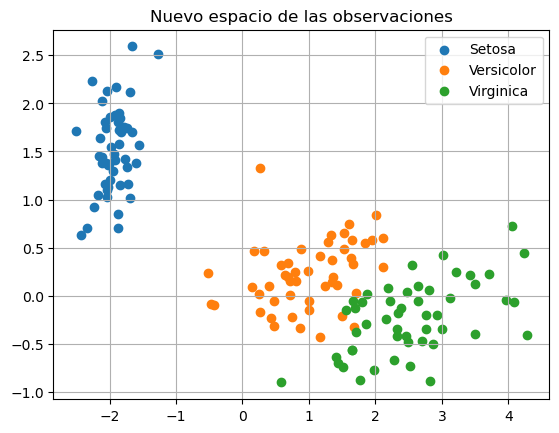

In [18]:
# Graficación de resultados
for kind in set(df["variety"]):
    idx = (df[df["variety"] == kind]).index
    plt.scatter(new_mat[idx, 0], new_mat[idx, 1], label=kind)
plt.legend()
plt.grid()
plt.title("Nuevo espacio de las observaciones")
plt.show()

### Sobre el rendmiento de los algoritmos

Una pregunta interesante que se puede hacer acerca del tiempo de ejecución de los algoritmos es si alguna estimación de tamaño de paso es mejor. Se sabe que la tercera estimación provoca que el tamaño de paso desaparezca, por lo tanto, se omite. Por otro lado, en el algoritmo de *Multidimensional Scaling* no se puede emplear ninguna de las dos aproximaciones no constantes porque no se implementó el hessiano de la función de costo. Así que para realizar esta comparación, se empleará la función de Rosenbrock como función a minimizar.

En el archivo `src/profiling.py` se implementó la clase abstracta `Profiler`. Esta clase implementa el método `profile` que permite corren `nruns` veces de forma paralela la solución del problema de optimización dado. Y se definieron dos clases hijas `RosenbrockProfiler` y `MdsProfiler` para obtener las métricas de cómputo deseadas de cada problema de optimización estudiado en este trabajo.

In [36]:
from src.profiling import RosenbrockProfiler
nruns = 1000 #Se resolverá la misma función nruns veces

fixed_rosen_prof = RosenbrockProfiler("FIXED_STEP")
approx1_rosen_prof = RosenbrockProfiler("APPROX1_STEP")

In [37]:
#fixed_rosen_records = fixed_rosen_prof.profile(nruns, 128)
#np.savetxt("data/fixed_rosen_prof.csv", fixed_rosen_records)

#approx1_rosen_records = approx1_rosen_prof.profile(nruns, 128)
#np.savetxt("data/approx1_rosen_prof.csv", approx1_rosen_records)

In [39]:
fixed_rosen_records = np.loadtxt("data/fixed_rosen_prof.csv")
approx1_rosen_records = np.loadtxt("data/approx1_rosen_prof.csv")

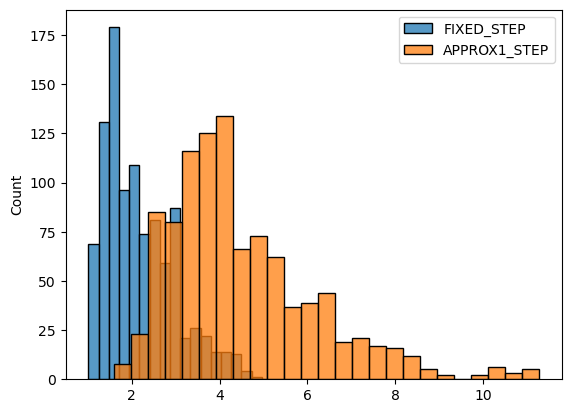

In [43]:
import seaborn as sns

sns.histplot(fixed_rosen_records, label='FIXED_STEP')
sns.histplot(approx1_rosen_records, label='APPROX1_STEP')
plt.legend()
plt.plot()
plt.show()

La hipótesis nula es que en efecto la estimación es más rápida que usando un tamaño de paso constante $\alpha = 0.0001$. Se podría usar una prueba de hipótesis para rechazarla, pero la figura de arriba es suficiente prueba gráfica para rechazarla. Es verdad que las primeras gráficas muestran que "APPROX1_STEP" requiere de menos iteraciones que "FIXED", pero la implementación usada recalcula el gradiente para calcular la estimación, es decir, la implementación es ineficiente. Este es un aspecto observado hasta este punto. Además, se tienen que tomar en cuenta todos los "trucos" que se utilizaron para generar los resultados: paralelización de los procesos (con `multithreading`), vectorización (con `numpy`), compilación en tiempo de ejecución (con `numba`). Todas estas manipulaciones complican el análisis de los algortimos.

Otra pregunta interesante es determinar la complejidad del tiempo de ejecucicón de los algoritmos usando datos experimentales. No obstante, esto involucraría utilizar un método de regresión no lineal sobre un conjunto de datos obtenido al evaluar muchas combinaciones de las dimensiones de la función de optimización. Se desarrolló el código para hacerlo, pero debido a limitaciones de poder de cómputo se decidió dejarlo como un trabajo futuro.

## Conclusiones